In [1]:
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import random
import string
import timeit

In [2]:
# global variable for graph plotting
time_list = []
accuracy_list = []

In [3]:
def sentence_map():
    alphabet_list = list(string.ascii_lowercase) # generate a list of alphabet using string module
    alphabet_image = alphabet_list.copy()
    random.shuffle(alphabet_image) # shuffle the list to generate images

    # append some common symbols to both the lists
    common_symbols = ['!', '?', '.', ',', ' ']
    alphabet_list.extend(common_symbols)
    alphabet_image.extend(common_symbols)

    orig_sentence = input("Enter a sentence to be mapped: ").lower() # accept a sentence (in lower case)

    # print out a reference table of alphabet and their images
    print("")
    print('Alphabet: ', *alphabet_list, sep='  ')
    print('   Image: ', *alphabet_image, sep='  ')
    print("")

    # accept a mapped sentence from user and time it.
    time_start = timeit.default_timer() # start the timer
    mapped_sentence = input("Now enter the mapped sentence: ").lower()
    time_stop = timeit.default_timer() # stop the timer
    time_total = time_stop - time_start

    time_list.append(time_total)

    # generate a 'required' sentence, i.e. the answer the user is supposed to enter.
    rq_list = []
    rq_sentence = ""
    rq_list = [alphabet_image[alphabet_list.index(char)] for char in orig_sentence if (char in alphabet_list)]
    for w in rq_list:
        rq_sentence += w

    # calculate accuracy using fuzzywuzzy module
    accuracy = fuzz.ratio(rq_sentence, mapped_sentence)

    accuracy_list.append(accuracy)

    print("\n-----------------------------------------------------------")
    print("Original sentence you entered is: ", orig_sentence)
    print("Mapped sentence you entered is: ", mapped_sentence)
    print("Required mapped sentence was: ", rq_sentence)
    print("Time taken: {:.2f} seconds".format(time_total))
    print("You are {}% accurate.".format(accuracy))
    print("-----------------------------------------------------------")
    print("")

In [4]:
# repeat the test 'n' times
n = 4
for itr in range(1, n+1) :
    print("Current iteration: ", itr)
    sentence_map()

Current iteration:  1
Enter a sentence to be mapped: hello

Alphabet:   a  b  c  d  e  f  g  h  i  j  k  l  m  n  o  p  q  r  s  t  u  v  w  x  y  z  !  ?  .  ,   
   Image:   d  l  j  p  z  k  x  f  h  y  m  r  q  t  g  i  b  a  v  e  n  c  o  w  u  s  !  ?  .  ,   

Now enter the mapped sentence: fzllo

-----------------------------------------------------------
Original sentence you entered is:  hello
Mapped sentence you entered is:  fzllo
Required mapped sentence was:  fzrrg
Time taken: 7.56 seconds
You are 40% accurate.
-----------------------------------------------------------

Current iteration:  2
Enter a sentence to be mapped: good morning

Alphabet:   a  b  c  d  e  f  g  h  i  j  k  l  m  n  o  p  q  r  s  t  u  v  w  x  y  z  !  ?  .  ,   
   Image:   h  o  u  e  y  r  v  m  w  n  t  s  a  b  d  i  x  q  f  k  z  g  c  l  j  p  !  ?  .  ,   

Now enter the mapped sentence: vdde aqning

-----------------------------------------------------------
Original sentence you entere

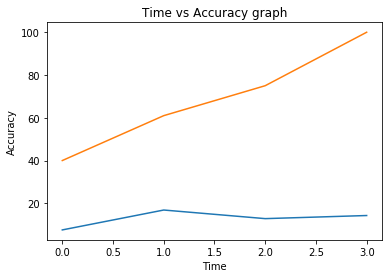

In [5]:
# now we show the graph
plt.title("Time vs Accuracy graph")
plt.xlabel("Time")
plt.ylabel("Accuracy")
#plt.xticks(np.arange(4), ('I1', 'I2', 'I3', 'I4'))
plt.plot(time_list)
plt.plot(accuracy_list)
plt.show()